In [1]:
from utils import *

import pandas as pd
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle 
from tqdm import tqdm 
import os
import seaborn as sns
sns.despine()

/Users/Selim/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
file = open('./Visualization/' + "list_results_max_cnn.pkl",'rb')
list_results = pickle.load(file)
file = open('./Visualization/' + "list_results_selim_cnn.pkl",'rb')
list_results.extend(pickle.load(file))
with open('./Visualization/' + 'list_results_tot_cnn.pkl', 'wb') as f:
    pickle.dump(list_results, f)

In [25]:
df1 = pd.DataFrame(list_results,columns=['ticker','max_train_accuracy','max_val_accuracy','epoch_max_train','epoch_max_val'])

In [26]:
df1.index = df1['ticker']

In [27]:
#best accuracy over training
list_train_acc = list()
#best accuracy over validation
list_val_acc = list()
#epoch when best accuracy training happened
list_train_epoch = list()
#epoch when best accuracy val happened
list_val_epoch = list()
list_ticker = list()

for result in list_results:
    list_ticker.append(result['ticker'])
    list_train_acc.append(result['max_train_accuracy'])
    list_val_acc.append(result['max_val_accuracy'])
    list_train_epoch.append(result['epoch_max_train'])
    list_val_epoch.append(result['epoch_max_val'])

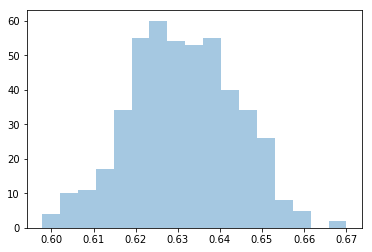

In [28]:
sns.distplot(list_train_acc, kde= False)


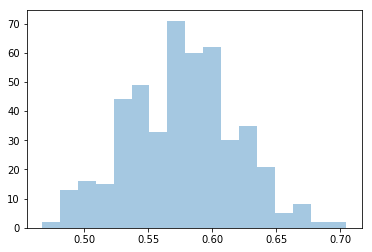

In [29]:
sns.distplot(list_val_acc, kde= False)

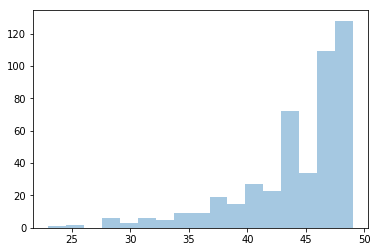

In [30]:
sns.distplot(list_train_epoch, kde= False)

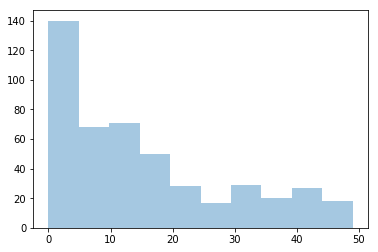

In [31]:
sns.distplot(list_val_epoch, kde= False)

/Users/Selim/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[Text(0,0,'EFX'),
 Text(0,0,'MET'),
 Text(0,0,'EQIX'),
 Text(0,0,'LYB'),
 Text(0,0,'TDG'),
 Text(0,0,'NFLX'),
 Text(0,0,'PNR'),
 Text(0,0,'FISV'),
 Text(0,0,'KEY'),
 Text(0,0,'ACN'),
 Text(0,0,'ATVI'),
 Text(0,0,'CINF'),
 Text(0,0,'COO'),
 Text(0,0,'AEP'),
 Text(0,0,'CHRW'),
 Text(0,0,'COF'),
 Text(0,0,'PRGO'),
 Text(0,0,'VMC'),
 Text(0,0,'ALGN'),
 Text(0,0,'HSY'),
 Text(0,0,'T'),
 Text(0,0,'CHTR'),
 Text(0,0,'DUK'),
 Text(0,0,'TAP'),
 Text(0,0,'NUE'),
 Text(0,0,'FFIV'),
 Text(0,0,'MCK'),
 Text(0,0,'A'),
 Text(0,0,'AIG'),
 Text(0,0,'EBAY'),
 Text(0,0,'WY'),
 Text(0,0,'F'),
 Text(0,0,'NTRS'),
 Text(0,0,'DPS'),
 Text(0,0,'RF'),
 Text(0,0,'MON'),
 Text(0,0,'RHT'),
 Text(0,0,'AEE'),
 Text(0,0,'XEC'),
 Text(0,0,'DRI'),
 Text(0,0,'NRG'),
 Text(0,0,'CMG'),
 Text(0,0,'IBM'),
 Text(0,0,'ADP'),
 Text(0,0,'PEG'),
 Text(0,0,'MKC'),
 Text(0,0,'CMI'),
 Text(0,0,'AMD'),
 Text(0,0,'BWA'),
 Text(0,0,'MHK'),
 Text(0,0,'HRL'),
 Text(0,0,'PG'),
 Text(0,0,'INCY'),
 Text(0,0,'BXP'),
 Text(0,0,'XOM'),
 Text(

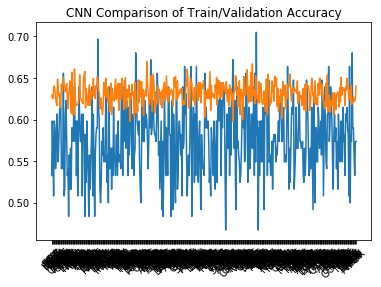

In [32]:
fig = plt.figure()
plt.plot(list_val_acc)
plt.plot(list_train_acc)
plt.title('CNN Comparison of Train/Validation Accuracy')

ax = fig.add_subplot(111)

ax.set_xticks(range(len(list_ticker)))
ax.set_xticklabels(list_ticker, rotation=45)

In [33]:
file = open("list_results_caps.pkl",'rb')
list_results_caps = pickle.load(file)

In [34]:
df = pd.DataFrame(list_results_caps,columns=['ticker','max_train_accuracy','max_val_accuracy','epoch_max_train','epoch_max_val'])

In [35]:
df.index = df['ticker']

In [36]:
df2 = df1.join(df,rsuffix = '_caps')

In [37]:
len(df2)

468

In [38]:
df2.head()

,ticker,max_train_accuracy,max_val_accuracy,epoch_max_train,epoch_max_val,ticker_caps,max_train_accuracy_caps,max_val_accuracy_caps,epoch_max_train_caps,epoch_max_val_caps
ticker,,,,,,,,,,
EFX,EFX,0.629328,0.532787,47,14,EFX,0.623218,0.581967,6.0,0.0
MET,MET,0.626273,0.598361,42,7,NaN,NaN,NaN,NaN,NaN
EQIX,EQIX,0.625255,0.557377,47,1,EQIX,0.634420,0.614754,6.0,0.0
LYB,LYB,0.638493,0.508197,49,6,NaN,NaN,NaN,NaN,NaN
TDG,TDG,0.640530,0.598361,43,41,NaN,NaN,NaN,NaN,NaN


In [49]:
df2 = df2[~np.isnan(df2['max_val_accuracy_caps'])]

In [81]:
def caps_greater(x, y):
    if x>=y:
        return 'Capsnet_better'
    else:
        return 'CNN_better'

In [82]:
df2['capsnet_greater'] = df2.apply(lambda x: caps_greater(x.max_val_accuracy_caps, x.max_val_accuracy), axis=1)

In [75]:
df2.head()

,ticker,max_train_accuracy,max_val_accuracy,epoch_max_train,epoch_max_val,ticker_caps,max_train_accuracy_caps,max_val_accuracy_caps,epoch_max_train_caps,epoch_max_val_caps,capsnet_greater
ticker,,,,,,,,,,,
EFX,EFX,0.629328,0.532787,47,14,EFX,0.623218,0.581967,6.0,0.0,Capsnet better
EQIX,EQIX,0.625255,0.557377,47,1,EQIX,0.634420,0.614754,6.0,0.0,Capsnet better
COO,COO,0.631365,0.606557,48,4,COO,0.639511,0.622951,6.0,4.0,Capsnet better
AEP,AEP,0.614053,0.622951,40,35,AEP,0.653768,0.622951,6.0,3.0,Capsnet better
COF,COF,0.642566,0.540984,41,1,COF,0.658859,0.475410,6.0,2.0,CNN better


import seaborn as sns
sns.regplot(x=df2["max_val_accuracy"], y=df2["max_val_accuracy_caps"], fit_reg=False, hue=df2["capsnet_greater"])
plt.title('Scatter Plot Capsnet vs. CNN Maximum Validation Accuracy')
plt.ylabel('Capnset Accuracy')
plt.xlabel('CNN Accuracy')

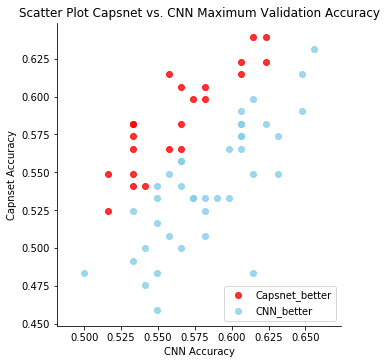

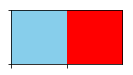

In [87]:

import seaborn as sns

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="max_val_accuracy", y="max_val_accuracy_caps", data=df2, fit_reg=False,
           hue='capsnet_greater', legend=False, markers=["o", "o"],
           palette=dict(Capsnet_better="red", CNN_better="skyblue"))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()
plt.title('Scatter Plot Capsnet vs. CNN Maximum Validation Accuracy')
plt.ylabel('Capnset Accuracy')
plt.xlabel('CNN Accuracy')
flatui = ["skyblue", "red"]
sns.palplot(sns.color_palette(flatui))

In [41]:
len(df2)

61

Text(0,0.5,'Validation Accuracy')

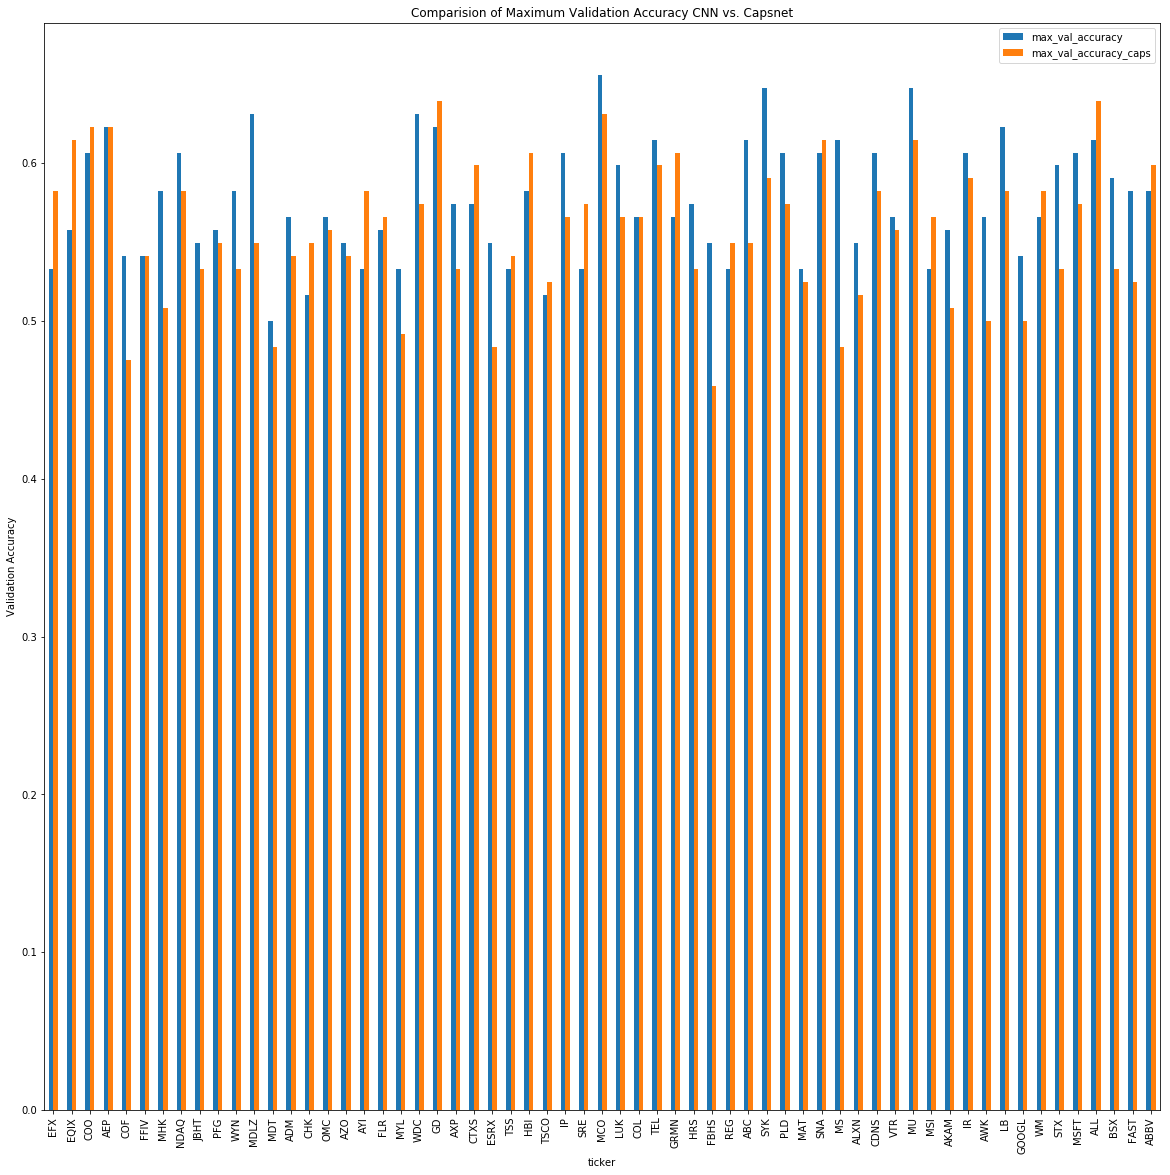

In [42]:
%matplotlib inline
plt.figure(figsize=(25,25));



df2[['max_val_accuracy', 'max_val_accuracy_caps']].plot(kind='bar',figsize=(20,20))
plt.title('Comparision of Maximum Validation Accuracy CNN vs. Capsnet')
plt.ylabel('Validation Accuracy')

Text(0.5,1,'Distribution Maximum Validation Accuracy CNN vs. Capsnet')

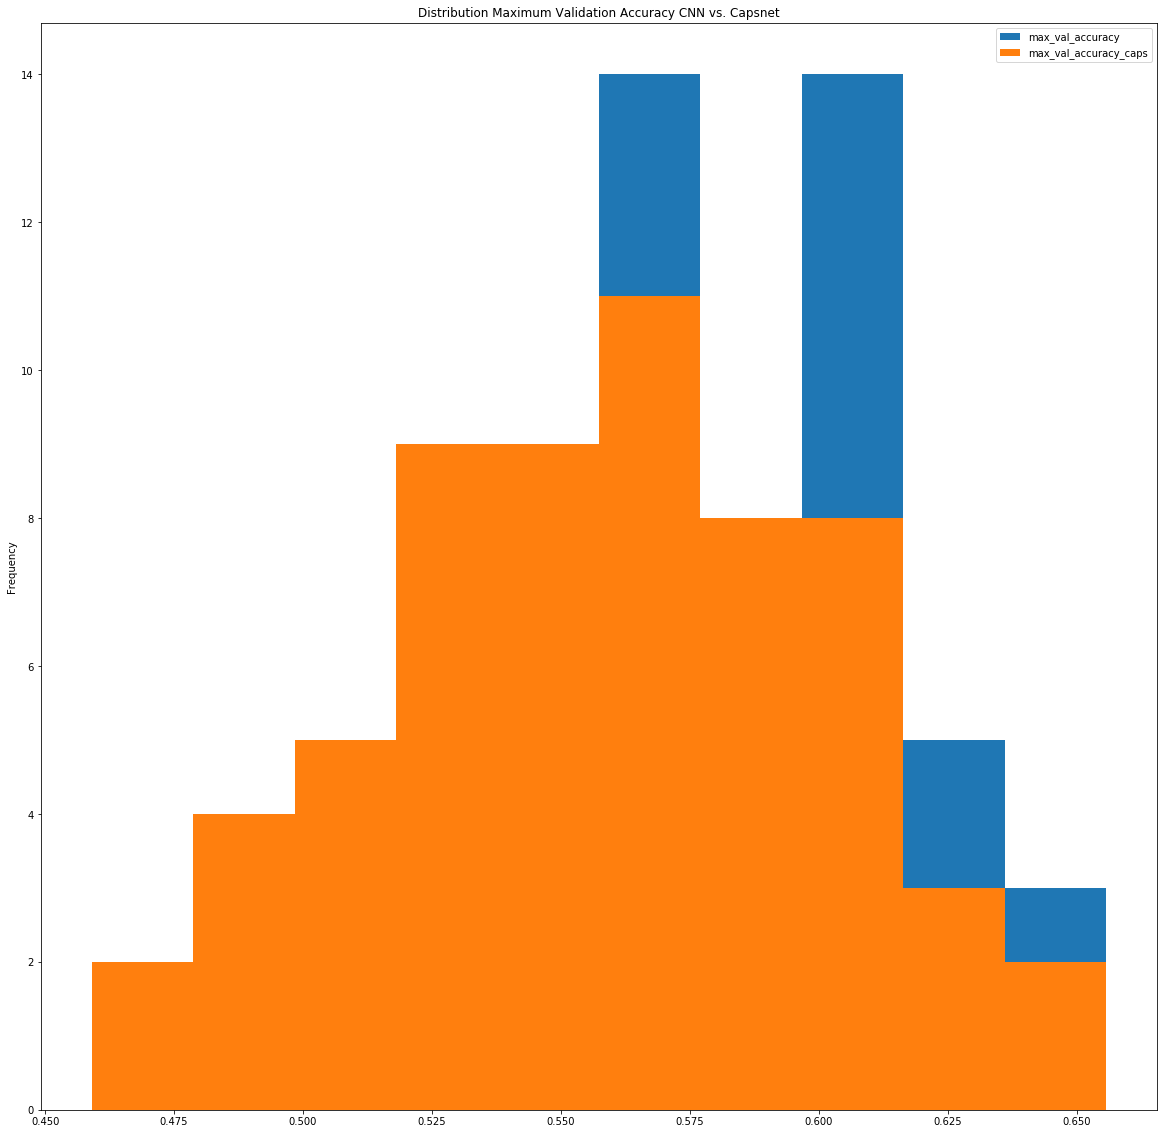

In [43]:
df2[['max_val_accuracy', 'max_val_accuracy_caps']].plot(kind='hist',figsize=(20,20))
plt.title('Distribution Maximum Validation Accuracy CNN vs. Capsnet')

Text(0.5,0,'Maximum Validation Accuracy')

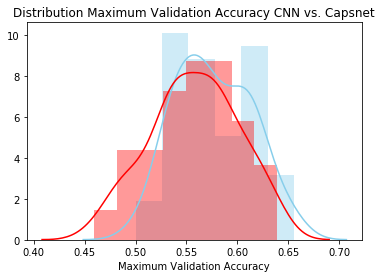

In [77]:
import seaborn as sns
 
# Method 1: on the same Axis
sns.distplot( df2["max_val_accuracy"] , color="skyblue", label="CNN ACCURACY")
sns.distplot( df2["max_val_accuracy_caps"] , color="red", label="CAPSNET ACCURACY")
plt.title('Distribution Maximum Validation Accuracy CNN vs. Capsnet')
plt.xlabel('Maximum Validation Accuracy')
#sns.plt.legend()
 
#sns.plt.show()
